# Import Libraries:

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

# Loading the Data:

In [2]:
df = pd.read_csv('data/final_data.csv')

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


# Data Preprocessing:

In [4]:
temp = df[['goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards', 'second yellow cards', 'red cards', 'minutes played']].copy()
temp.iloc[:, :-1] = temp.iloc[:, :-1].apply(lambda x: x * (temp['minutes played'] / 90))
temp.head()

,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,0.0,0.0,35.0,127.0,1.0,0.0,0.0,9390
1,0.0,0.0,3.0,18.0,1.0,0.0,0.0,1304
2,0.0,0.0,3.0,2.0,0.0,0.0,0.0,292
3,2.0,4.0,0.0,0.0,16.0,0.0,0.0,6408
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,5031


In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.rename(columns={
    'goals': 'goals_per_90',
    'assists': 'assists_per_90',
    'clean sheets': 'clean_sheets_per_90',
    'goals conceded': 'goals_conceded_per_90',
    'yellow cards': 'yellow_cards_per_90',
    'second yellow cards': 'second_yellow_cards_per_90',
    'red cards': 'red_cards_per_90',
    'minutes played': 'minutes_played_per_90'
}, inplace=True)
df.head()

,player,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,...,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df = pd.concat([df, temp], axis=1)
df.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90',
                     'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 
                     'minutes played', 'position_encoded' ],axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   days_injured         10754 non-null  int64  
 8   games_injured        10754 non-null  int64  
 9   award                10754 non-null  int64  
 10  current_value        10754 non-null  int64  
 11  highest_value        10754 non-null  int64  
 12  goals                10754 non-null  float64
 13  assists              10754 non-null  float64
 14  clean sheets         10754 non-null  float64
 15  goals conceded       10754 non-null 

In [7]:
df['position'] = df['position'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split(' ')[0])
df['position'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'Attack'], dtype=object)

In [8]:
df.drop(['player', 'name'], axis=1, inplace=True)

In [9]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [10]:
df = df[df['team'] != 'Gaziantep FK']

In [11]:
df.shape

(10748, 17)

# Model Building:

## Feature Engineering:

In [12]:
df = pd.get_dummies(df, columns=['team'])

In [13]:
df.shape

(10748, 389)

In [14]:
# Step 1: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

# Step 2: Drop non-numeric columns from the dataframe
df_numeric = df.drop(columns=non_numeric_cols)

# Step 3: Calculate the correlation matrix for numeric columns
correlation = df_numeric.corr()
print(correlation['current_value'].sort_values(ascending=False))


Non-numeric columns: Index(['position', 'team_1.FC Köln', 'team_1.FC Union Berlin',
       'team_1.FSV Mainz 05', 'team_AA Argentinos Juniors', 'team_AC Ajaccio',
       'team_AC Milan', 'team_AC Monza', 'team_ACF Fiorentina',
       'team_AFC Bournemouth',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=374)
current_value          1.000
highest_value          0.835
assists                0.442
appearance             0.420
goals                  0.402
yellow cards           0.302
award                  0.300
games_injured          0.136
days_injured           0.108
second yellow cards    0.061
red cards              0.060
height                 0.041
clean sheets           0.025
goals conceded         0.000
age

In [15]:
threshold = 0.2

selected_features = correlation.index[abs(correlation['current_value']) > threshold]
selected_features

Index(['appearance', 'award', 'current_value', 'highest_value', 'goals',
       'assists', 'yellow cards'],
      dtype='object')

In [16]:
df = df[selected_features]

In [17]:
df.shape

(10748, 7)

In [18]:
df.head(2)

,appearance,award,current_value,highest_value,goals,assists,yellow cards
0,104,13,15000000,70000000,0.000,0.000,1.000
1,15,1,1500000,22000000,0.000,0.000,1.000


## Data Preparation:

In [19]:
X = df.drop(['current_value'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X.columns

Index(['appearance', 'award', 'highest_value', 'goals', 'assists',
       'yellow cards', 'kmeans'],
      dtype='object')

# Model Building:

### step 1 :crate object and assign the model 

In [20]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

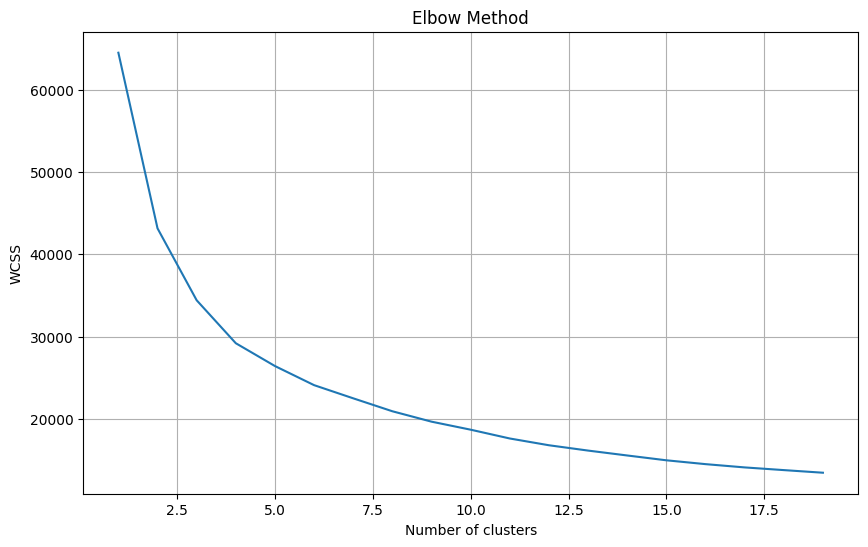

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [22]:
optimal_k = 4.5
model = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10)

# Data Preprocessing:

## Model Training:

In [23]:
# Ensure n_clusters is an integer
n_clusters = 4  # Update this to the desired number of clusters

# Create the KMeans model
model = KMeans(n_clusters=n_clusters)

# Fit the model and predict cluster labels
y_pred = model.fit_predict(X_scaled)


In [24]:
X['kmeans'] = y_pred

# Model Evaluation:

In [25]:
X.head()

,appearance,award,highest_value,goals,assists,yellow cards,kmeans
0,104,13,70000000,0.000,0.000,1.000,3
1,15,1,22000000,0.000,0.000,1.000,2
2,4,4,6000000,0.000,0.000,0.000,2
3,82,9,50000000,2.000,4.000,16.000,3
4,63,21,80000000,1.000,1.000,3.000,3


In [26]:
X['kmeans'].value_counts()

kmeans
2    5769
0    3675
1    1025
3     279
Name: count, dtype: int64

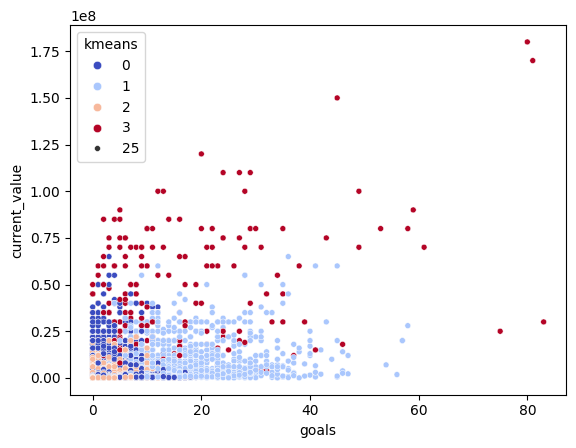

In [27]:
sns.scatterplot(x='goals', y='current_value', data=df, hue=X['kmeans'], palette='coolwarm', size=25)
plt.show()


<Axes: xlabel='appearance', ylabel='award'>

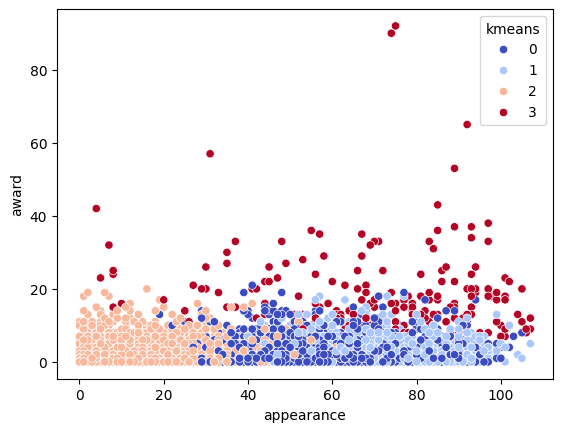

In [28]:
sns.scatterplot(x='appearance', y='award', data=df, hue=X['kmeans'], palette='coolwarm')

In [30]:
import os
import joblib

# التأكد من وجود الدليل "Models"، وإذا لم يكن موجودًا، سيتم إنشاؤه
os.makedirs('Models', exist_ok=True)

# حفظ النموذج والمقياس
joblib.dump(model, 'ML-Kmeans.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')


['Models/scaler.joblib']